In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/stud.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [ ]:
# check statistics of data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [16]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [17]:
print("Categories in 'gender' variable:    ",end=" ")
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:    ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in 'parental level of education' variable:    ",end=" ")
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:    ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:    ",end=" ")
print(df['test preparation course'].unique())

print("Categories in 'math score' variable:    ",end=" ")
print(df['math score'].unique())

print("Categories in 'reading score' variable:    ",end=" ")
print(df['reading score'].unique())

print("Categories in 'writing score' variable:    ",end=" ")
print(df['writing score'].unique())



Categories in 'gender' variable:     ['female' 'male']
Categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:     ['standard' 'free/reduced']
Categories in 'test preparation course' variable:     ['none' 'completed']
Categories in 'math score' variable:     [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Categories in 'reading score' variable:     [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41 

In [18]:
## define numerical & categorical columns

numeric_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

print('We have {} numerical features : {}.'.format(len(numeric_features), numeric_features))
print('We have {} categorical features : {}.'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score'].
We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'].


## Adding column for "Total Score " and "Average'



In [20]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']

df['average'] = df['total score']/3

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
df.describe()

,math score,reading score,writing score,total score,average
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000,67.770667
std,15.16308,14.600192,15.195657,42.771978,14.257326
min,0.00000,17.000000,10.000000,27.000000,9.000000
25%,57.00000,59.000000,57.750000,175.000000,58.333333
50%,66.00000,70.000000,69.000000,205.000000,68.333333
75%,77.00000,79.000000,79.000000,233.000000,77.666667
max,100.00000,100.000000,100.000000,300.000000,100.000000


In [33]:
reading_full = df[df['reading score']==100]['average'].count()
writing_full = df[df['writing score']==100]['average'].count()
math_full = df[df['math score']==100]['average'].count()


print(f"Number of students with full marks in math {math_full}")
print(f"Number of students with full marks in wriring {writing_full}")
print(f"Number of students with full marks in reading {reading_full}")

Number of students with full marks in math 7
Number of students with full marks in wriring 14
Number of students with full marks in reading 17


In [34]:
reading_less_20 = df[df['reading score'] <=20]['average'].count()
writing_less_20 = df[df['writing score']<=20]['average'].count()
math_less_20 = df[df['math score']<=20]['average'].count()


print(f"Number of students with less than 20 marks in math {math_less_20}")
print(f"Number of students with less than 20 marks in wriring {writing_less_20}")
print(f"Number of students with less than 20 marks in reading {reading_less_20}")

Number of students with less than 20 marks in math 4
Number of students with less than 20 marks in wriring 3
Number of students with less than 20 marks in reading 1


## Histogram & KDE


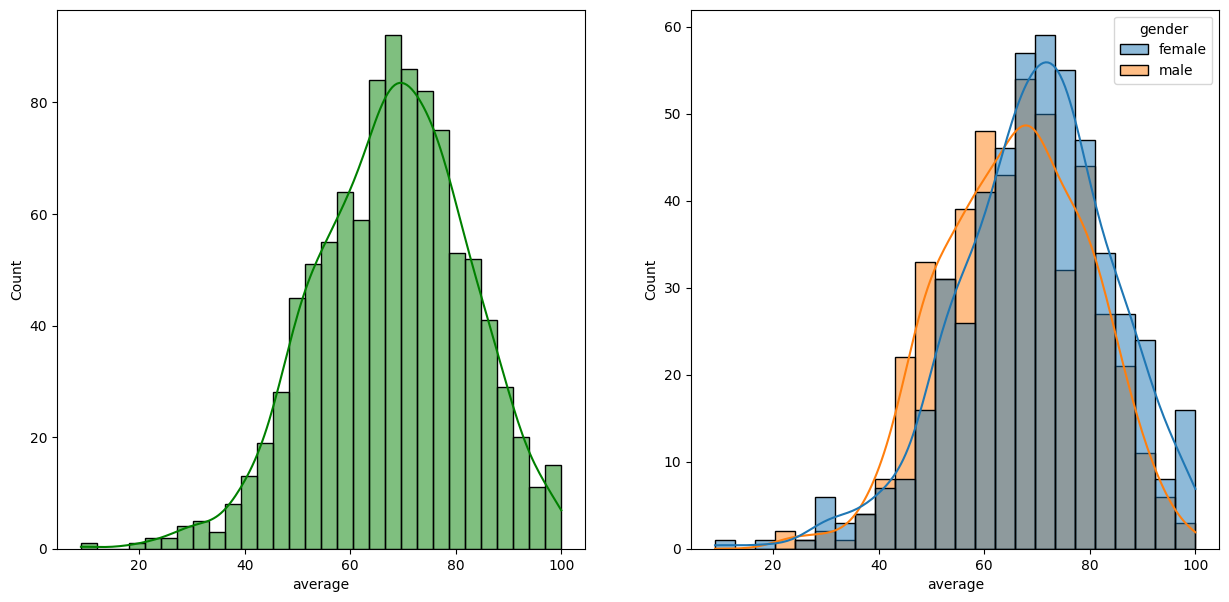

In [41]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

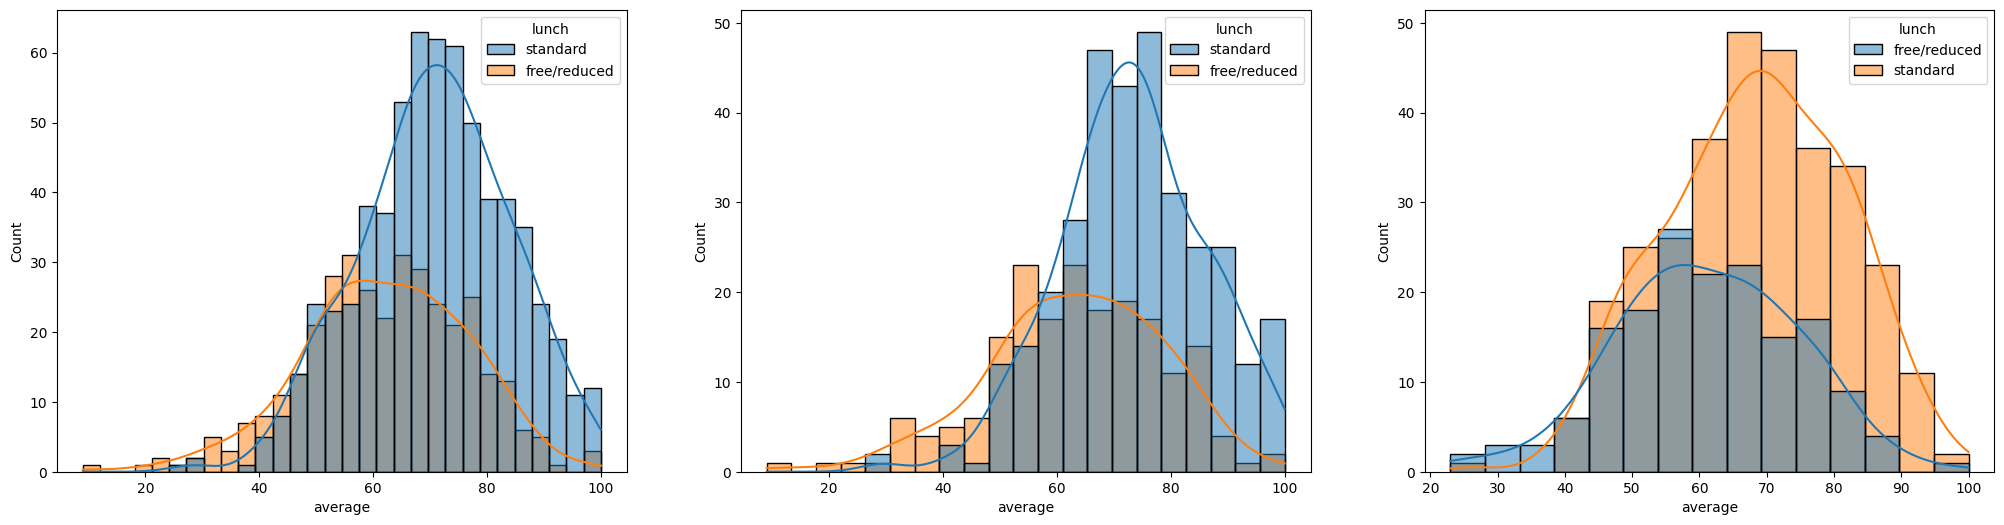

In [44]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')

plt.show()

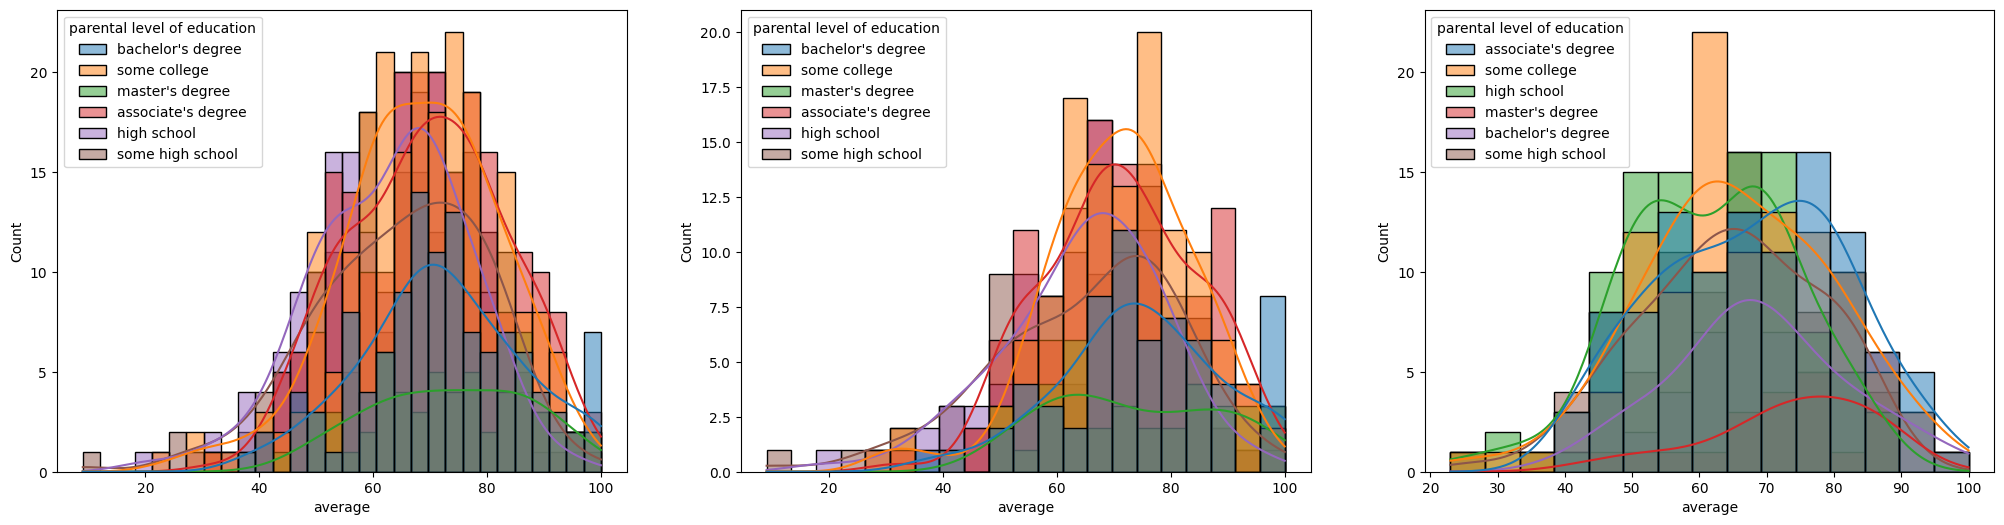

In [46]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='parental level of education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental level of education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental level of education')

plt.show()

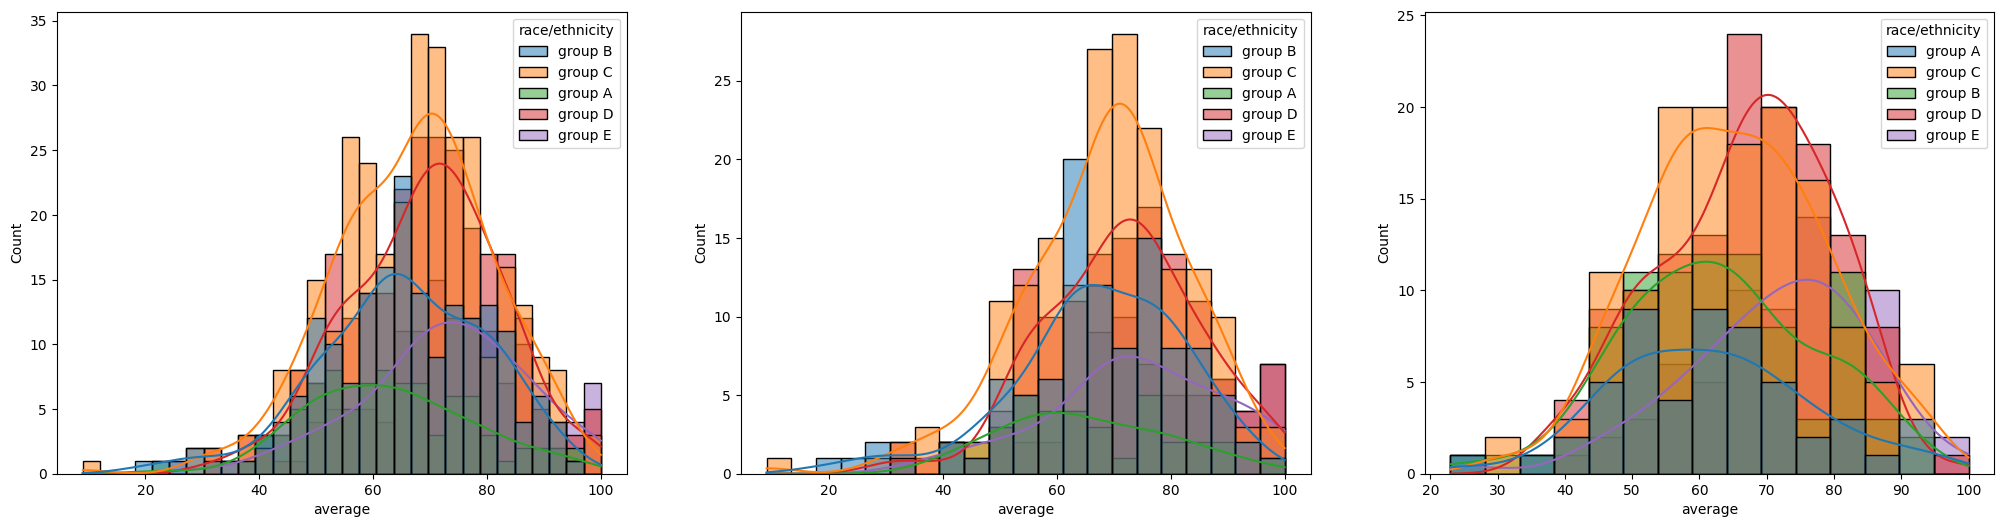

In [47]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='race/ethnicity')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race/ethnicity')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race/ethnicity')

plt.show()

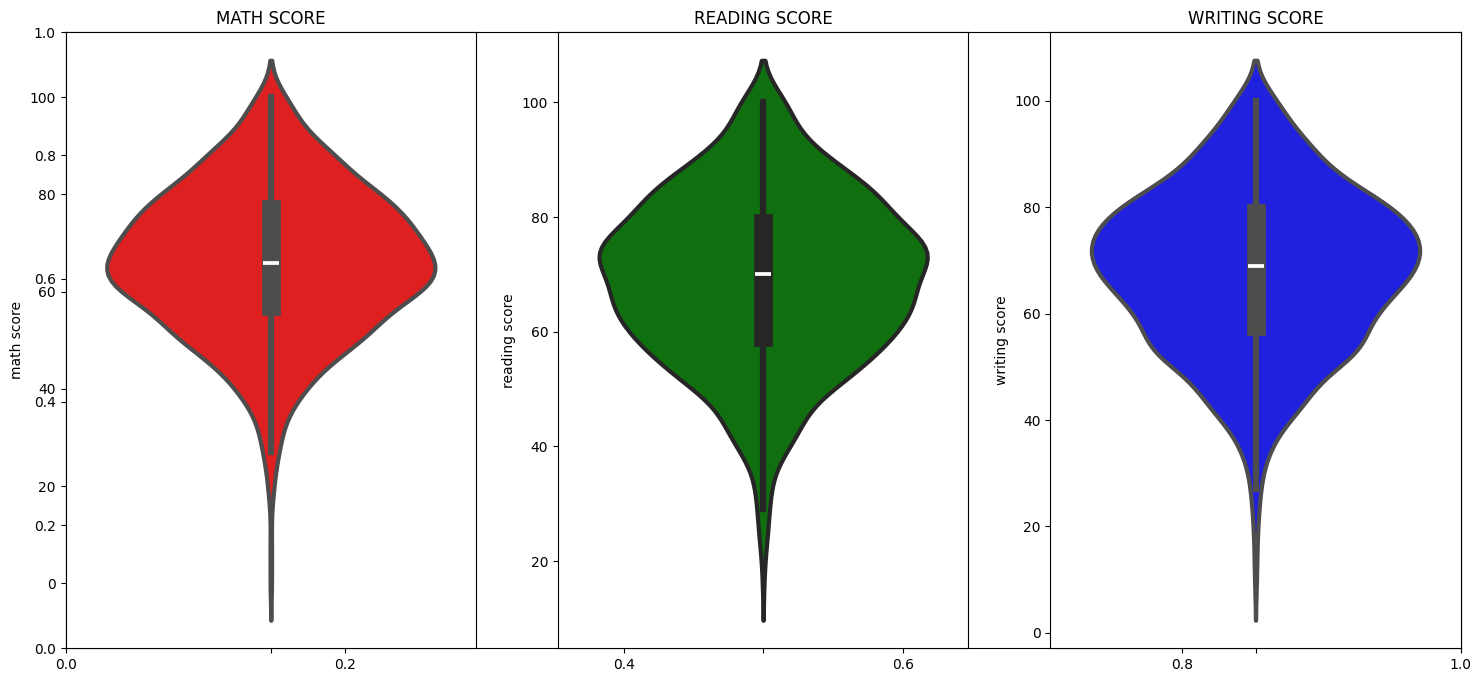

In [50]:
plt.subplots(figsize=(18,8))
plt.subplot(1,3,1)
plt.title('MATH SCORE')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1,3,2)
plt.title('READING SCORE')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1,3,3)
plt.title('WRITING SCORE')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

## multivariate analysis using pieplot


(-1.25, 1.25, -1.25, 1.25)

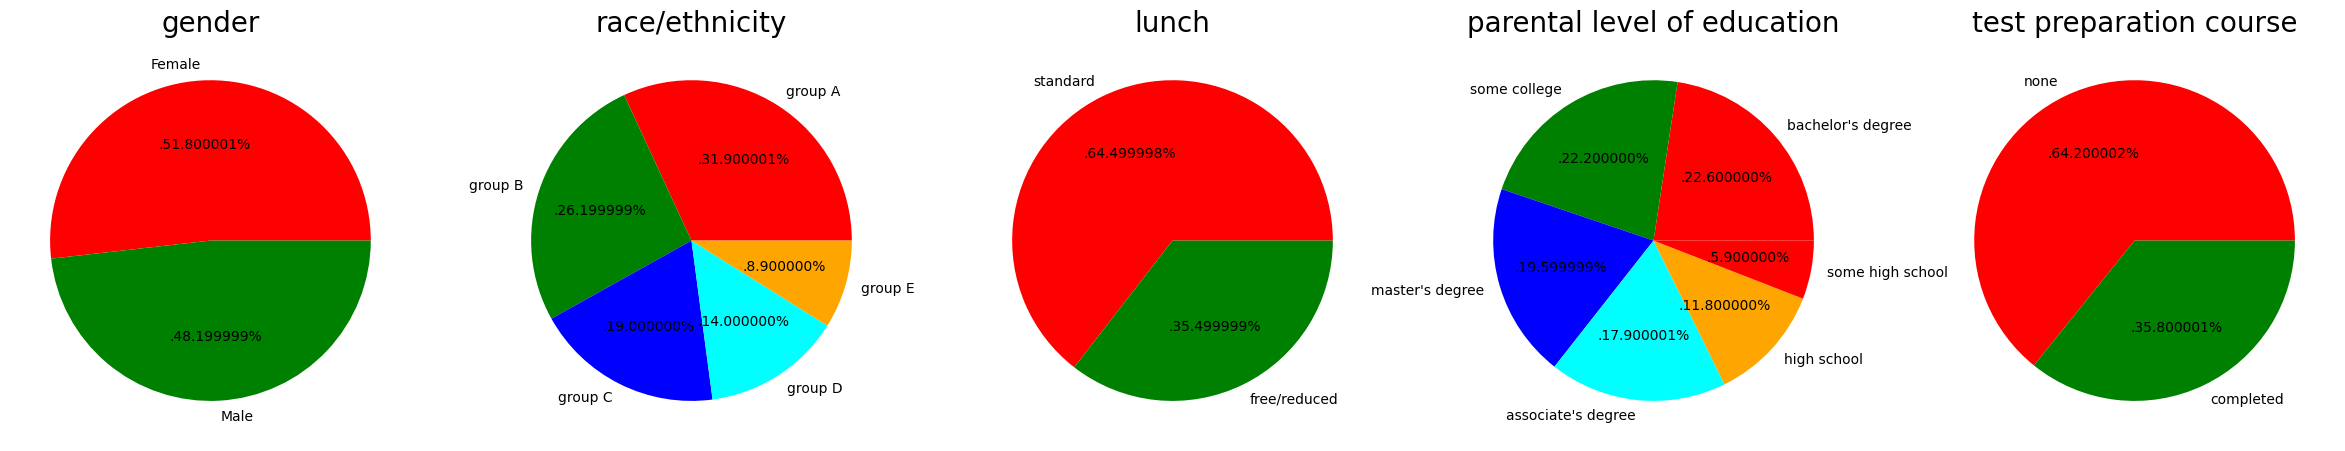

In [63]:
plt.rcParams['figure.figsize']=(30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
lables = ['Female','Male']
color = ['red','green']

plt.pie(size,colors=color,labels=lables,autopct='.%2f%%')
plt.title('gender',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race/ethnicity'].value_counts()
lables = ['group A' ,'group B' ,'group C' ,'group D' ,'group E']
color = ['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=lables,autopct='.%2f%%')
plt.title('race/ethnicity',fontsize = 20)
plt.axis('off')


plt.subplot(1,5,3)
size = df['lunch'].value_counts()
lables =['standard' ,'free/reduced']
color = ['red','green']

plt.pie(size,colors=color,labels=lables,autopct='.%2f%%')
plt.title('lunch',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['parental level of education'].value_counts()
lables =  ["bachelor's degree", 'some college' ,"master's degree" ,"associate's degree", 'high school' ,'some high school']
color = ['red','green','blue','cyan','orange']

plt.pie(size,colors=color,labels=lables,autopct='.%2f%%')
plt.title('parental level of education',fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['test preparation course'].value_counts()
lables =  ['none' ,'completed']
color = ['red','green']

plt.pie(size,colors=color,labels=lables,autopct='.%2f%%')
plt.title('test preparation course',fontsize = 20)
plt.axis('off')


# plt.tight_layout()
# plt.grid()
# plt.show()

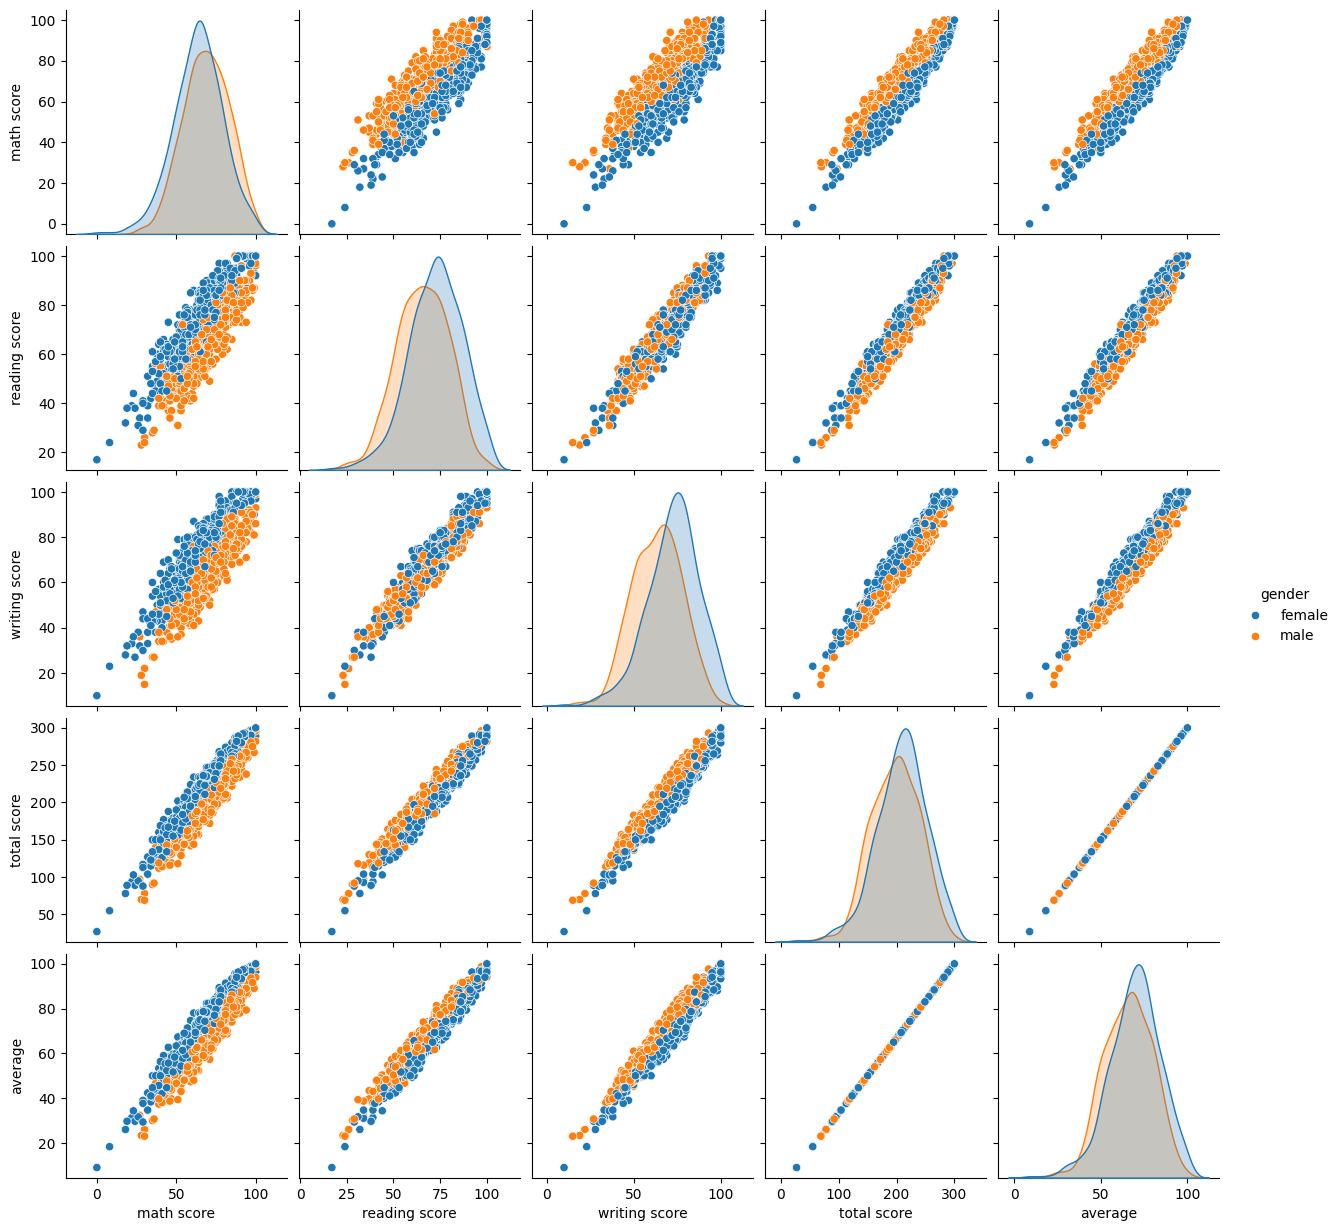

In [64]:
sns.pairplot(df,hue='gender')
plt.show()

## checking outliers

<Axes: ylabel='average'>

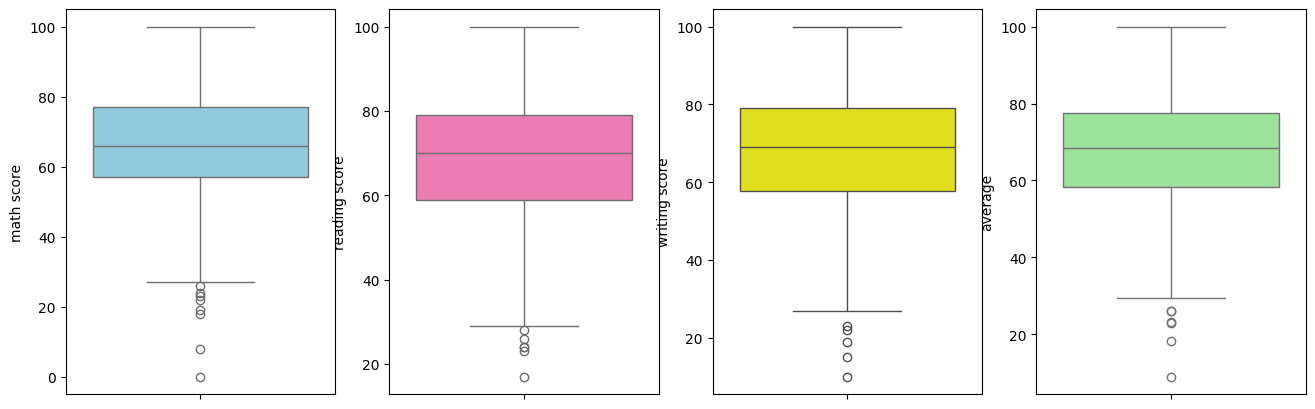

In [67]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')